In [1]:
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt

current_dir = os.getcwd()
path = current_dir
image_dir = path + "/pairs/"

In [2]:
# termination criteria

criteria = ( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW

# inner size of chessboard
width = 9
height = 6
square_size = 0.025 # 0.025 meters
img_width = 640
img_height = 480
image_size = ( img_width , img_height )


# prepare object points , like (0 ,0 ,0) , (1 ,0 ,0) , (2 ,0 ,0) .... ,(8 ,6 ,0)

objp = np . zeros (( height * width , 1, 3) , np . float64 )
objp [: , 0, :2] = np . mgrid [0: width , 0: height ]. T. reshape ( -1 , 2)
objp = objp * square_size # Create real world coords . Use your metric .
def calibrate_fisheye(right_or_left: str):
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane .

    number_of_images = 50
    for i in range (10 , 27):
        # read image
        img = cv2 . imread ( image_dir + right_or_left + "_%02d.png" % i)
        gray = cv2 . cvtColor ( img , cv2 . COLOR_BGR2GRAY )
        # Find the chess board corners
        ret , corners = cv2 . findChessboardCorners ( gray , ( width , height ) , cv2.CALIB_CB_ADAPTIVE_THRESH + cv2 . CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE )
        Y , X , channels = img . shape
        # skip images where the corners of the chessboard are too close to the edges of the image
        if ( ret == True ) :
            minRx = corners [: ,: ,0]. min ()
            maxRx = corners [: ,: ,0]. max ()
            minRy = corners [: ,: ,1]. min ()
            maxRy = corners [: ,: ,1]. max ()

            border_threshold_x = X /12
            border_threshold_y = Y /12

            x_thresh_bad = False

            if ( minRx < border_threshold_x ):
                x_thresh_bad = True

            y_thresh_bad = False

            if ( minRy < border_threshold_y ):
                y_thresh_bad = True
            if ( y_thresh_bad == True ) or ( x_thresh_bad == True ):
                continue
    # If found , add object points , image points ( after refining them )
        if ret == True :
            objpoints . append ( objp )
            # improving the location of points (sub - pixel )
            corners2 = cv2 . cornerSubPix ( gray , corners , (3 , 3) , ( -1 , -1) , criteria )
            imgpoints . append ( corners2 )
            # Draw and display the corners
            # Show the image to see if pattern is found ! imshow function .
            cv2 . drawChessboardCorners ( img , ( width , height ) , corners2 , ret )
            cv2 . imshow ("Corners", img )
            cv2 . waitKey (25)
        else :
            print (" Chessboard couldn t detected . Image pair : ", i)
            continue
    cv2.destroyAllWindows()
    return np.asarray(objpoints, dtype=np.float64) , np.asarray(imgpoints,dtype=np.float64)


objpoints , imgpoints = calibrate_fisheye("left")
# Calibration
N_OK = len ( objpoints )
K = np . zeros ((3 , 3) )
D = np . zeros ((4 , 1) )
rvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
tvecs = [ np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK )]
ret , K , D , _ , _ = \
    cv2 . fisheye . calibrate (
    objpoints ,
    imgpoints ,
    image_size ,
    K ,
    D ,
    rvecs ,
    tvecs ,
    calibration_flags ,
    ( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 1e-6)
    )
# Let ’s rectify our results
map1 , map2 = cv2 . fisheye . initUndistortRectifyMap (K , D , np . eye (3) , K , image_size ,
cv2 . CV_16SC2 )

cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kacper/semestr_6/ZaawansowaneAlgorytmyWizyjne/venv/lib/python3.10/site-packages/cv2/qt/plugins"


In [3]:
print("Macierz parametrów wewnetrzncyh kamery: \n", K)
print("Wspolczynnik Znieksztalcen: \n", D)
print("wartosc błedu sredniokwadratowego projekcji wstecznej: ", ret)
print("Wektory rotacji:\n ", rvecs)
print("Wektory translacji \n", tvecs)


Macierz parametrów wewnetrzncyh kamery: 
 [[335.42125344   0.         345.37228024]
 [  0.         335.29249111 231.9330288 ]
 [  0.           0.           1.        ]]
Wspolczynnik Znieksztalcen: 
 [[-0.02299657]
 [-0.02507364]
 [ 0.05095322]
 [-0.03545741]]
wartosc błedu sredniokwadratowego projekcji wstecznej:  0.11287421184037637
Wektory rotacji:
  [array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]])]
Wektory translacji 
 [array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]

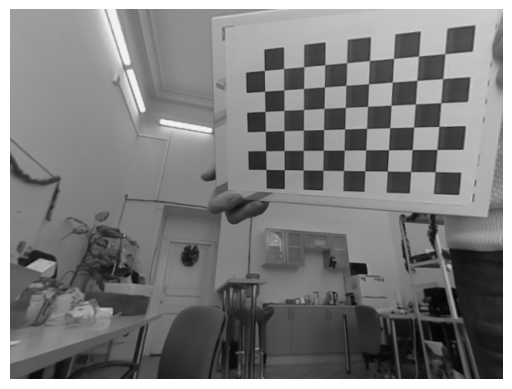

In [4]:

image = cv2.imread(image_dir + "/left_01.png")
undistorted_image = cv2 . remap (image, map1, map2, interpolation = cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT )

plt.imshow(undistorted_image)
plt.axis('off')
plt.show()


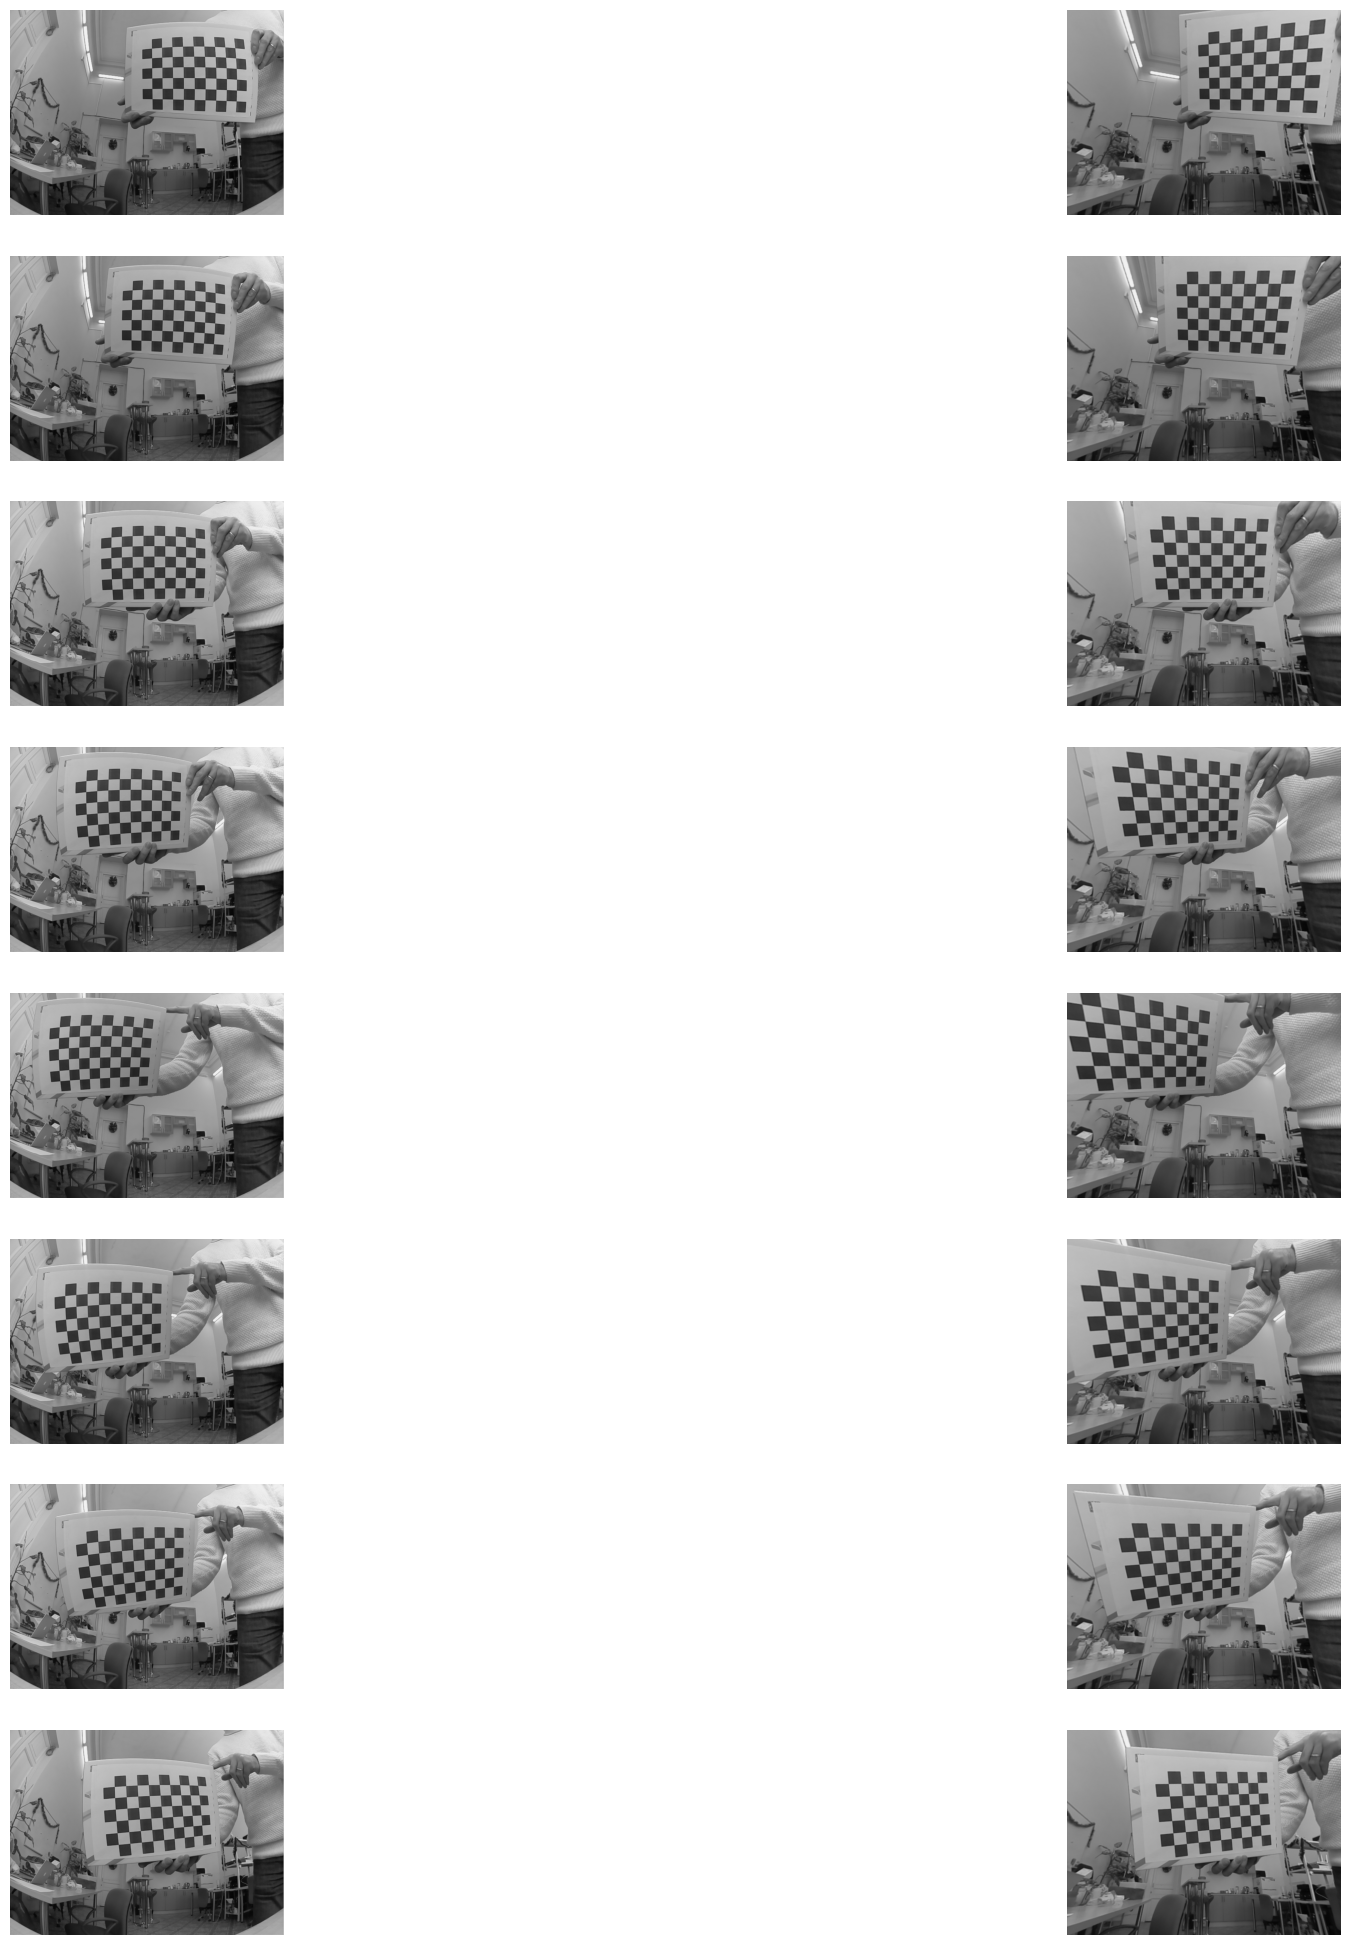

In [5]:
fig, axs = plt.subplots(8, 2, figsize=(25, 25))


for i in range(1, 9):
    image = cv2.imread(image_dir + "left_%02d.png" % i)
    undistorted_image = cv2 . remap (image, map1, map2, interpolation = cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT )
    axs[i - 1, 1].imshow(undistorted_image)
    axs[i - 1, 1].axis('off')
    axs[i - 1, 0].imshow(image)
    axs[i - 1, 0].axis('off')
plt.show()

In [6]:
objpointsLeft, imgpointsLeft = calibrate_fisheye("left")
objpointsRight,imgpointsRight = calibrate_fisheye("right")
print("----------------------")
def calibrate_single(objpoints, imgpoints):
  N_OK = len(objpoints)
  K = np.zeros((3, 3))
  D = np.zeros((4, 1))
  rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
  tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]

  ret, K, D, _, _ = cv2.fisheye.calibrate(objpoints, imgpoints, image_size, K, D, rvecs, tvecs, calibration_flags, (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))
  return K, D

K_left, D_left = calibrate_single(objpointsLeft, imgpointsLeft)
K_right, D_right = calibrate_single(objpointsRight, imgpointsRight)

----------------------


In [7]:
( RMS , _ , _ , _ , _ , rotationMatrix , translationVector ) = cv2 . fisheye . stereoCalibrate (
        objpointsLeft , imgpointsLeft , imgpointsRight ,
        K_left , D_left ,
        K_right , D_right ,
        image_size , None , None ,
        cv2 . CALIB_FIX_INTRINSIC ,
        ( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.01) 
        )

R2 = np . zeros ([3 ,3])
P1 = np . zeros ([3 ,4])
P2 = np . zeros ([3 ,4])
Q = np . zeros ([4 ,4])

# Rectify calibration results
( leftRectification , rightRectification , leftProjection , rightProjection ,
dispartityToDepthMap ) = cv2 . fisheye . stereoRectify (
        K_left , D_left ,
        K_right , D_right ,
        image_size ,
        rotationMatrix , translationVector ,
        0, R2 , P1 , P2 , Q ,
        cv2 . CALIB_ZERO_DISPARITY , (0 ,0) , 0 , 0)

map1_left , map2_left = cv2 . fisheye . initUndistortRectifyMap (
        K_left , D_left , leftRectification ,
        leftProjection , image_size , cv2 . CV_16SC2 )

map1_right , map2_right = cv2 . fisheye . initUndistortRectifyMap (
        K_right , D_right , rightRectification ,
        rightProjection , image_size , cv2 . CV_16SC2 )

In [8]:
img_l = cv2 . imread (image_dir + "left_01.png" )
img_r = cv2 . imread (image_dir + "right_01.png" )

In [9]:
dst_L = cv2 . remap ( img_l , map1_left , map2_left , cv2 . INTER_LINEAR )
dst_R = cv2 . remap ( img_r , map1_right , map2_right , cv2 . INTER_LINEAR )

In [10]:
N , XX , YY = dst_L . shape [:: -1] # RGB image size
visRectify = np . zeros (( YY , XX *2 , N) , np . uint8 ) # create a new image with a new size
( height , 2* width )
visRectify [: ,0: XX : ,:] = dst_L # left image assignment
visRectify [: , XX : XX *2: ,:] = dst_R # right image assignment
# draw horizontal lines
for y in range (0 , YY ,10) :
    cv2 . line ( visRectify , (0 , y) , ( XX *2 , y) , (255 ,0 ,0) )
cv2 . imshow ('visRectify ', visRectify ) # display image with lines
cv2 . waitKey (0)
cv2 . destroyAllWindows ()


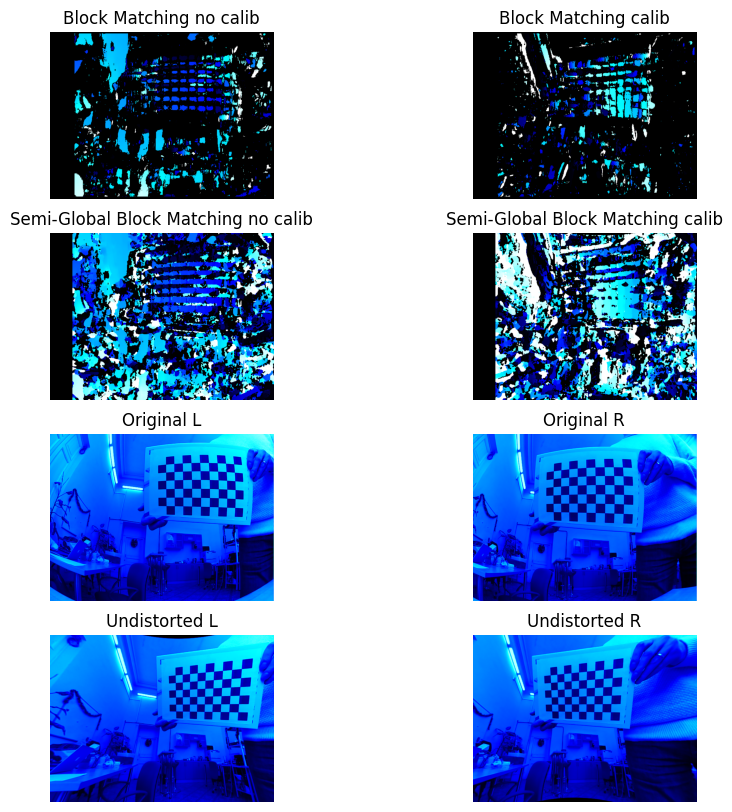

In [11]:
left_image = cv2.imread(image_dir + "left_01.png", cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread(image_dir + "right_01.png", cv2.IMREAD_GRAYSCALE)
left_undistorted_image = cv2 . remap (left_image, map1_left, map2_left, interpolation = cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT )
right_undistorted_image = cv2 . remap (right_image, map1_right, map2_right, interpolation = cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT )
stereoBM = cv2 . StereoBM_create ( numDisparities = 64 , blockSize = 15 )
disparity_BM = stereoBM . compute ( left_image , right_image )
disparity_undisoorted_BM = stereoBM . compute ( left_undistorted_image , right_undistorted_image )


stereoSGBM = cv2 . StereoSGBM_create ( minDisparity = 0 , numDisparities = 64 , blockSize = 15 )
disparity_SGBM = stereoSGBM . compute ( left_image , right_image )
disparity_undisoorted_SGBM = stereoSGBM . compute ( left_undistorted_image , right_undistorted_image )

left_image = cv2.applyColorMap(left_image, cv2.COLORMAP_HOT)
right_image = cv2.applyColorMap(right_image, cv2.COLORMAP_HOT)
left_undistorted_image = cv2.applyColorMap(left_undistorted_image, cv2.COLORMAP_HOT)
right_undistorted_image = cv2.applyColorMap(right_undistorted_image, cv2.COLORMAP_HOT)

disparity_BM = cv2.normalize(disparity_BM, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_undisoorted_BM = cv2.normalize(disparity_undisoorted_BM, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_SGBM = cv2.normalize(disparity_SGBM, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
disparity_undisoorted_SGBM = cv2.normalize(disparity_undisoorted_SGBM, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

disparity_BM = cv2.applyColorMap(disparity_BM, cv2.COLORMAP_HOT)
disparity_undisoorted_BM = cv2.applyColorMap(disparity_undisoorted_BM, cv2.COLORMAP_HOT)
disparity_SGBM = cv2.applyColorMap(disparity_SGBM, cv2.COLORMAP_HOT)
disparity_undisoorted_SGBM = cv2.applyColorMap(disparity_undisoorted_SGBM, cv2.COLORMAP_HOT)

fig, axs = plt.subplots(4,2 , figsize=(10, 10))
axs[0, 0].imshow(disparity_BM, cmap='gray')
axs[0, 0].axis('off')
axs[0, 0].set_title('Block Matching no calib')
axs[0, 1].imshow(disparity_undisoorted_BM, cmap='gray')
axs[0, 1].axis('off')
axs[0, 1].set_title('Block Matching calib')
axs[1, 0].imshow(disparity_SGBM, cmap='gray')
axs[1, 0].axis('off')
axs[1, 0].set_title('Semi-Global Block Matching no calib')
axs[1, 1].imshow(disparity_undisoorted_SGBM, cmap='gray')
axs[1, 1].axis('off')
axs[1, 1].set_title('Semi-Global Block Matching calib')
axs[2, 0].imshow(left_image, cmap='gray')
axs[2, 0].axis('off')
axs[2, 0].set_title('Original L')
axs[2, 1].imshow(right_image, cmap='gray')
axs[2, 1].axis('off')
axs[2, 1].set_title('Original R')
axs[3, 0].imshow(left_undistorted_image, cmap='gray')
axs[3, 0].axis('off')
axs[3, 0].set_title('Undistorted L')
axs[3, 1].imshow(right_undistorted_image, cmap='gray')
axs[3, 1].axis('off')
axs[3, 1].set_title('Undistorted R')
plt.show()



